### DecisionTreeClassifier

In [37]:
# import data from processed directory
change_blind = pd.read_pickle('/Users/decio/thesis/csi_thesis/data/processed/change_blindness.pkl')

In [38]:
change_blind

,Participant,FixDur,pixel,perc_moveable,perc_changedobject,perc_exitentry,perc_evidence,Group
0,1,408.996422,136.049432,37.019801,1.478815,3.506117,19.931855,Novice
1,2,346.977193,123.209801,30.921695,0.880790,4.176421,20.808284,Novice
2,3,301.240541,131.053170,39.747351,2.062642,1.934344,32.229789,Novice
3,4,316.424942,137.187018,30.346247,0.393396,3.498964,17.971419,Novice
4,5,396.392920,139.503716,40.164403,0.773345,2.186978,22.553826,Novice
5,6,326.321145,159.485878,36.544608,2.061815,5.705558,29.613263,Novice
6,7,350.025180,113.788266,35.839148,0.473244,4.235564,23.089295,Novice
7,8,407.092803,173.490131,37.808277,1.694387,4.146177,21.641350,Novice
8,9,311.318015,144.393822,30.835454,1.042768,4.363563,21.702085,Novice
9,102,322.535368,111.001297,35.605982,1.258235,4.427043,23.336687,Novice


#### Preprocessing

In [40]:
# Recode variables to 1 and 2
change_blind.Group = change_blind.Group.map(dict(Novice = int(1), CSI = int(2)))

#### modelfitting

In [41]:
#Decisionclassifier
X = change_blind.loc[:,'FixDur':'perc_exitentry']
y = change_blind.loc[:,'Group']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 2018)

In [42]:
# Scikit-learn pipeline
pipeline = Pipeline([
    ('clf', DecisionTreeClassifier(criterion = 'entropy'))
])

# Parameters for the gridsearch
parameters = {
    'clf__max_depth':(5,10,15),
    'clf__min_samples_split': (2,3,4),
    'clf__min_samples_leaf' : (1,2,3)
}

In [43]:
grid_search = GridSearchCV(pipeline, parameters, verbose = 0, scoring = 'f1')

In [44]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('clf', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'clf__max_depth': (5, 10, 15), 'clf__min_samples_split': (2, 3, 4), 'clf__min_samples_leaf': (1, 2, 3)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

In [46]:
best_params = grid_search.best_params_

In [ ]:
print('Best score: %0.3f' %grid_search.best_score_)
print('Best parameters set:')

print('_____________')
for param_name in sorted(parameters.keys()):
    print('t%s: %r' % (param_name, best_params[param_name]))

#### prediction

In [47]:
predictions = grid_search.predict(X_test)

In [48]:
print(classification_report(y_test, predictions))

             precision    recall  f1-score   support

          1       1.00      0.60      0.75         5
          2       0.33      1.00      0.50         1

avg / total       0.89      0.67      0.71         6



In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, predictions, normalize = True)
plt.show()

#### Visualize results

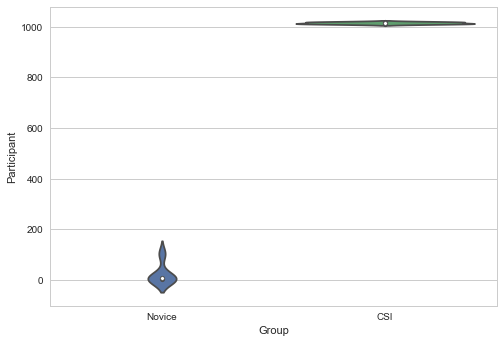

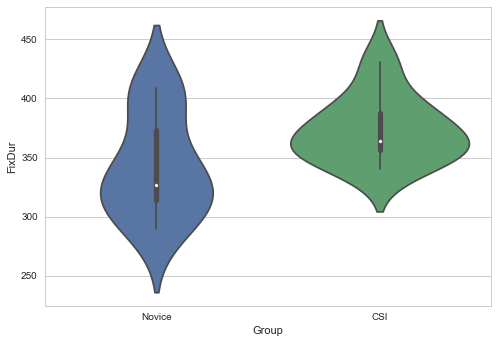

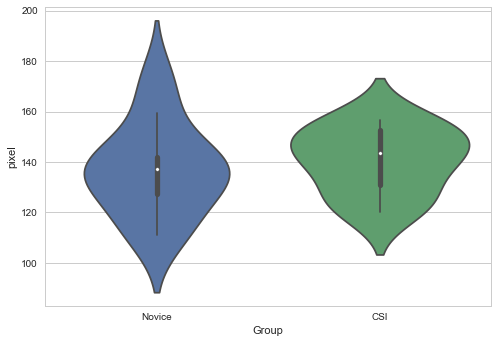

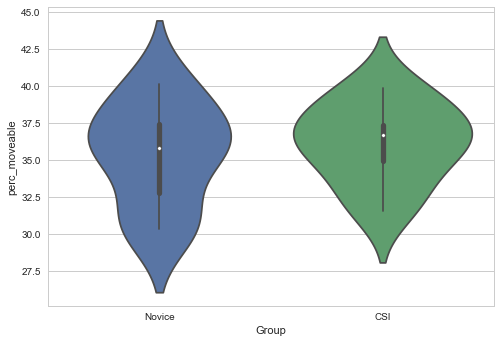

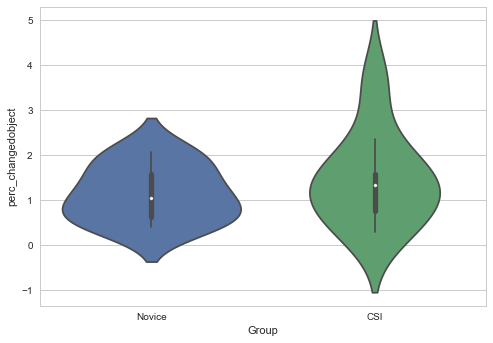

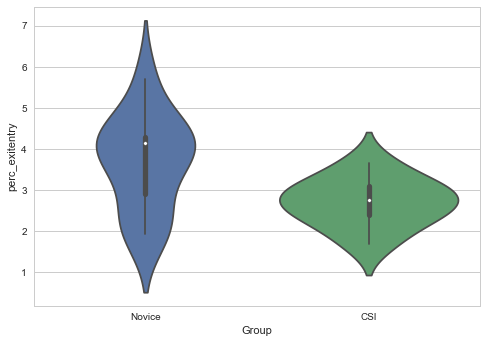

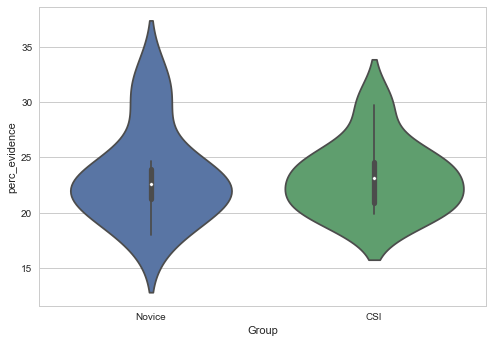

ValueError: Neither the `x` nor `y` variable appears to be numeric.

In [35]:
tips = change_blind

for i in list(change_blind.columns.values):
    sns.set(style = 'whitegrid')
    ax = sns.violinplot(x = 'Group', y = i, data = tips)
    plt.show()

### RandomForestClassifier

#### Vis implementation

In [24]:
#### preprocessing

In [4]:
fig = plt.figure()
ax = fig.add_subplot()
viz = FeatureImportances(RandomForestClassifier(), ax = ax)
viz.fit(X,y)

In [25]:
#### Visualization

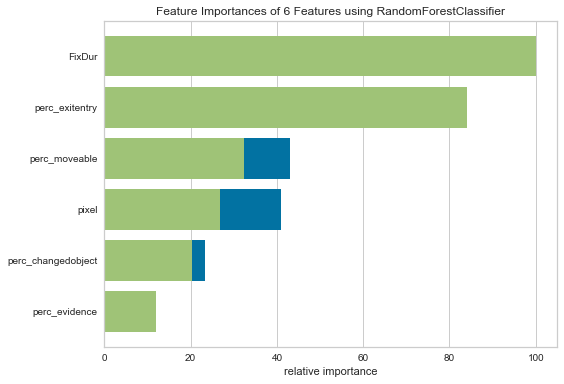

In [11]:
viz.poof()

#### scikit implementation

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 2018)

In [58]:
forest = RandomForestClassifier(criterion = 'entropy', n_estimators = 5, random_state = 1)

In [59]:
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [67]:
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]
labels = X_train.columns

In [92]:
np.argsort(importances)[::-1]

array([4, 0, 5, 3, 2, 1])

In [104]:
forest.feature_importances_

array([0.24176542, 0.05129458, 0.10621093, 0.11176628, 0.3034331 ,
       0.18552969])

In [105]:
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f " % (f +1,30, labels[f], importances[indices[f]]))

 1) FixDur                         0.303433 
 2) pixel                          0.241765 
 3) perc_moveable                  0.185530 
 4) perc_changedobject             0.111766 
 5) perc_exitentry                 0.106211 
 6) perc_evidence                  0.051295 


In [109]:
feature_importances

,importance
FixDur,0.241765
pixel,0.051295
perc_moveable,0.106211
perc_changedobject,0.111766
perc_exitentry,0.303433
perc_evidence,0.185530


In [28]:
plot_decision_region(X_combined, y_combined, classifier=forest, test_idx = range(105,150))

NameError: name 'X_combined' is not defined

In [27]:
def plot_decision_region(X, y, classifier, test_idx=None, resolution=0.02):
   # setup marker generator and color map
   markers = ('s', 'x', 'o', '^', 'v')
   colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
   cmap = ListedColormap(colors[:len(np.unique(y))])

   # plot the decision surface
   x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
   xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
   np.arange(x2_min, x2_max, resolution))
   Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
   Z = Z.reshape(xx1.shape)
   plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
   plt.xlim(xx1.min(), xx1.max())
   plt.ylim(xx2.min(), xx2.max())

   # plot all samples
   X_test, y_test = X[test_idx, :], y[test_idx]
   for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
               alpha=0.8, c=cmap(idx),
               marker=markers[idx], label=cl)
   # highlight test samples
   if test_idx:
      X_test, y_test = X[test_idx, :], y[test_idx]
      plt.scatter(X_test[:, 0], X_test[:, 1], c='',
               alpha=1.0, linewidth=1, marker='o',
               s=55, label='test set')
      plt.show()